In [1]:
# try to learn FODO stability

import os,sys
sys.path.append('/Users/ia/workspace/ocelot')
import ocelot
from ocelot import *
from pylab import *
QF = Quadrupole(l=0.1, k1=0.1)
QD = Quadrupole(l=0.1, k1=-0.14)
D = Drift(l=1.0)
fodo = (QF,D,QD,QD,D,QF)
lat = MagneticLattice(fodo)

math_op.py: module Numba is not installed. Install it if you want speed up correlation calculations


[INFO    ] : : csr.py: module NUMBA is not installed. Install it to speed up calculation
[INFO    ] csr.py: module NUMBA is not installed. Install it to speed up calculation
[INFO    ] csr.py: module PYFFTW is not installed. Install it to speed up calculation.
[INFO    ] csr.py: module NUMEXPR is not installed. Install it to speed up calculation
[INFO    ] wake3D.py: module NUMBA is not installed. Install it to speed up calculation


initializing ocelot...
import: module NUMBA is not installed. Install it to speed up calculation
import: module PYFFTW is not installed. Install it to speed up calculation
import: module NUMEXPR is not installed. Install it to speed up calculation


In [ ]:
#tws = twiss(lat, Twiss())

#generating training set


n_train = 10000

x_train = np.zeros([n_train,3])  
y_train = np.zeros([n_train,1])


for i in range(n_train):
    QF.k1 = np.random.rand()
    QD.k1 = -np.random.rand()
    D.l = 2.0 * np.random.rand()
    
    x_train[i,0] = QF.k1
    x_train[i,1] = QD.k1
    x_train[i,2] = D.l
    lat.update_transfer_maps()
    tws = twiss(lat, Twiss())
    if tws is None:
        y_train[i,0] = 0
    else:
        y_train[i,0] = 1


#print(x_train)
#print(y_train)


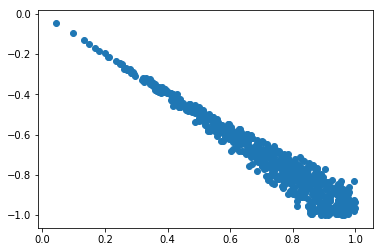

In [4]:
x1 = []
x2 = []
for i in range(n_train):
    if y_train[i] == 1:
        x1.append(x_train[i,0])
        x2.append(x_train[i,1])
plt.scatter(x1,x2)
plt.show()

In [5]:
import keras 
from keras.models import Sequential 
from keras.layers import Input, Dense, Dropout 
from keras.utils import to_categorical 
from pylab import *

#fixing a duplicate openmp dylib on mac???
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

model = Sequential() 
model.add(Dense(64, input_dim=3, activation='relu')) 
#model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='sgd',metrics=['accuracy'])
model.fit(x_train,y_train, epochs=30, batch_size=16)

Using TensorFlow backend.


Epoch 1/30
10000/10000 [==============================] - 2s 211us/step - loss: 0.3254 - acc: 0.9241
Epoch 2/30
10000/10000 [==============================] - 2s 153us/step - loss: 0.2748 - acc: 0.9313
Epoch 3/30
10000/10000 [==============================] - 2s 152us/step - loss: 0.2614 - acc: 0.9313
Epoch 4/30
10000/10000 [==============================] - 1s 149us/step - loss: 0.2492 - acc: 0.9313
Epoch 5/30
10000/10000 [==============================] - 2s 151us/step - loss: 0.2405 - acc: 0.9313
Epoch 6/30
10000/10000 [==============================] - 2s 151us/step - loss: 0.2295 - acc: 0.9313
Epoch 7/30
10000/10000 [==============================] - 2s 157us/step - loss: 0.2196 - acc: 0.9313
Epoch 8/30
10000/10000 [==============================] - 2s 153us/step - loss: 0.2089 - acc: 0.9313
Epoch 9/30
10000/10000 [==============================] - 2s 158us/step - loss: 0.2016 - acc: 0.9314
Epoch 10/30
10000/10000 [==============================] - 1s 146us/step - loss: 0.1958 - a

In [1]:
X, Y = np.meshgrid(np.linspace(-5,5,100),np.linspace(-5,5,100))
Z = 0. * X
for i in range(100):
    for j in range(100):
        p = np.array([[X[i,j],Y[i,j], 3.9]])
        #print(p)
        Z[i,j] =model.predict(p) #treat xv[i,j], yv[i,j]

plt.imshow(Z[::-1,:])
plt.show()

NameError: name 'np' is not defined

In [8]:
n_test = 5000

x_test = np.zeros([n_test,2])  
y_test = np.zeros([n_test,1])

D.l = 3.9

for i in range(n_test):
    QF.k1 = 5*np.random.rand()
    QD.k1 = -5*np.random.rand()
    
    x_test[i,0] = QF.k1
    x_test[i,1] = QD.k1
    lat.update_transfer_maps()
    tws = twiss(lat, Twiss())
    if tws is None:
        y_test[i,0] = 0
    else:
        y_test[i,0] = 1

[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ] 

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. retu

[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution
[WARNING ] :  ************ periodic solution does not exist. return None *********** (optics.py:990)
[INFO    ]  twiss: Twiss: no periodic solution


In [2]:
x1 = []
x2 = []
for i in range(n_test):
    if y_test[i] == 1:
        x1.append(x_test[i,0])
        x2.append(x_test[i,1])
        
plt.scatter(x1,x2)


x1 = []
x2 = []

for i in range(100):
    for j in range(100):
        if Z[i,j] > 0.5:
            x1.append(X[i,j])
            x2.append(Y[i,j])

plt.scatter(x1,x2, alpha=0.1)

plt.show()

NameError: name 'n_test' is not defined